In [1]:
import numpy as np
from aisynphys.database import default_db as db
from aisynphys.cell_class import CellClass, classify_cells, classify_pairs
from aisynphys.connectivity import measure_connectivity
import matplotlib.colors, matplotlib.cm
import matplotlib.pyplot as plt
from aisynphys.ui.notebook import show_connectivity_matrix
%matplotlib inline
print(db.schema_version)
matplotlib.rcParams['font.sans-serif'] = "Arial"

19


In [2]:
projects = ['mouse V1 coarse matrix', 'mouse V1 pre-production']
mouse_pairs = db.pair_query(project_name=projects).all()
print("loaded %d cell pairs" % len(mouse_pairs))

loaded 81452 cell pairs


In [5]:
l23_cell_class_criteria = {
    'E': {'cell_class_nonsynaptic': 'ex',  'cortical_layer': '2/3'},
    'Pv':  {'cre_type': 'pvalb',            'cortical_layer': '2/3'},
    'Sst': {'cre_type': 'sst',              'cortical_layer': '2/3'},
    'Vip': {'cre_type': 'vip',              'cortical_layer': '2/3'},
}

l23_cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in l23_cell_class_criteria.items()}

l4_cell_class_criteria = {
    'E':  {'cre_type': ('nr5a1', 'rorb'),  'cortical_layer': '4'},
    'Pv':   {'cre_type': 'pvalb',            'cortical_layer': '4'},
    'Sst':  {'cre_type': 'sst',              'cortical_layer': '4'},
    'Vip':  {'cre_type': 'vip',              'cortical_layer': '4'},
}

l4_cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in l4_cell_class_criteria.items()}

l5et_cell_class_criteria = {    
    'E':   {'cre_type': ('sim1', 'fam84b'),  'cortical_layer': '5'}, 
    'Pv':   {'cre_type': 'pvalb',            'cortical_layer': '5'},
    'Sst':  {'cre_type': 'sst',              'cortical_layer': '5'},
    'Vip':  {'cre_type': 'vip',              'cortical_layer': '5'},
}

l5et_cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in l5et_cell_class_criteria.items()}

l5it_cell_class_criteria = {    
    'E':   {'cre_type': 'tlx3',             'cortical_layer': '5'}, 
    'Pv':   {'cre_type': 'pvalb',            'cortical_layer': '5'},
    'Sst':  {'cre_type': 'sst',              'cortical_layer': '5'},
    'Vip':  {'cre_type': 'vip',              'cortical_layer': '5'},
}

l5it_cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in l5it_cell_class_criteria.items()}

l6_cell_class_criteria = {
    'E':  {'cre_type': 'ntsr1',            'cortical_layer': ('6a', '6b')},
    'Pv':   {'cre_type': 'pvalb',            'cortical_layer': ('6a', '6b')},
    'Sst':  {'cre_type': 'sst',              'cortical_layer': ('6a', '6b')},
    'Vip':  {'cre_type': 'vip',              'cortical_layer': ('6a', '6b')},
}

l6_cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in l6_cell_class_criteria.items()}

In [9]:
layer_connectivity = {
    'l23': {'cell_classes': l23_cell_classes},
    'l4': {'cell_classes': l4_cell_classes},
    'l5et': {'cell_classes': l5et_cell_classes},
    'l5it': {'cell_classes': l5it_cell_classes},
    'l6': {'cell_classes': l6_cell_classes},
}


for layer, opts in layer_connectivity.items():
    cell_classes = opts['cell_classes']
    
    # Group all cells by selected classes
    cell_groups = classify_cells(cell_classes.values(), pairs=mouse_pairs, missing_attr='ignore')

    # Group pairs into (pre_class, post_class) groups
    pair_groups = classify_pairs(mouse_pairs, cell_groups)

    # analyze matrix elements
    connectivity_results = measure_connectivity(pair_groups)
    
    class_labels = {cell_class: cell_class for cell_class in cell_classes.keys()}
    
    layer_connectivity[layer]['connectivity_results'] = connectivity_results
    layer_connectivity[layer]['class_labels'] = class_labels

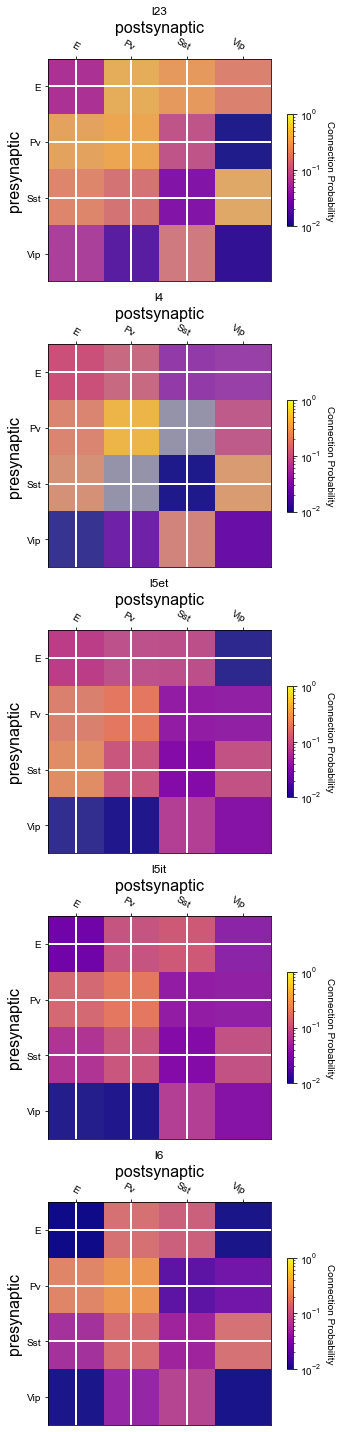

In [13]:
from aisynphys.ui.notebook import annotate_heatmap
# define a colormap and log normalization used to color the heatmap
norm = matplotlib.colors.LogNorm(vmin=0.01, vmax=1.0, clip=True)
cmap = matplotlib.cm.get_cmap('plasma')

# create a figure/axes to draw on
fig, ax = plt.subplots(len(layer_connectivity), 1, figsize=(5, 20))

for i, (layer, opts) in enumerate(layer_connectivity.items()):
    
    connectivity_results = opts['connectivity_results']
    cell_classes = opts['cell_classes']
    class_labels = opts['class_labels']
    
    # finally, draw the colormap using the provided function:
    im, cbar, labels = show_connectivity_matrix(
        ax=ax[i], 
        results=connectivity_results, 
        pre_cell_classes=cell_classes.values(), 
        post_cell_classes=cell_classes.values(), 
        class_labels=class_labels,
        cmap=cmap, 
        norm=norm,
        ctype='chemical',
        layer_lines = [0.5, 1.5, 2]
    )
    _ = [label.remove() for label in labels]
    
    ax[i].set_title(layer)
    
plt.tight_layout()